In [103]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, theme_bw, theme, element_blank,element_text, geom_bar, geom_label, labs, geom_smooth, scale_y_log10
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("C:\\Users\\thoma\\OneDrive\\Desktop\\Data Wrangling\\Final Project\\owid-energy-data.xlsx")
data.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [3]:
data.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)

In [4]:
data_2022 = data.loc[data['year'] == 2022]

data_2022.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
22,ASEAN (Ember),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.064,NaN,NaN,NaN,NaN,NaN,13.470,NaN,1.103,NaN
147,Afghanistan,2022,AFG,4.057880e+07,5.330347e+10,NaN,NaN,NaN,NaN,0.000,...,9.375,NaN,NaN,NaN,NaN,0.000,0.000,NaN,0.000,NaN
271,Africa,2022,NaN,1.446881e+09,NaN,-8.161,-0.116,0.902,1.305,2.143,...,2.653,0.714,7.681,4.194,60.747,17.037,24.650,41.985,2.670,1.025
331,Africa (EI),2022,NaN,NaN,NaN,-8.161,-0.116,NaN,1.305,NaN,...,1.889,0.714,7.681,4.194,60.747,NaN,24.724,NaN,2.712,1.025
376,Africa (EIA),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data_2022.describe(include="all")

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,293,293.0,220,2.310000e+02,1.660000e+02,84.000000,149.000000,119.000000,149.000000,226.000000,...,258.000000,111.000000,105.000000,111.000000,111.000000,225.000000,258.000000,90.000000,257.000000,111.000000
unique,293,NaN,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ASEAN (Ember),NaN,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2022.0,NaN,1.408282e+08,1.569316e+12,3.924333,2.658436,202.574798,49.377423,100.330168,...,4.366698,1.645739,144.505648,33.277595,289.165405,213.192911,75.516601,1091.137233,4.290681,2.740640
std,NaN,0.0,NaN,6.923141e+08,1.040953e+13,27.832547,8.668613,353.991093,156.067460,243.163016,...,6.149199,1.576957,1354.240449,91.927132,773.754919,501.150643,266.713559,1680.743205,7.408623,3.719938
min,NaN,2022.0,NaN,1.812000e+03,6.750980e+08,-100.000000,-2.144000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-5.932000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2022.0,NaN,1.028215e+06,3.470008e+10,-5.789500,0.000000,0.000000,0.000000,0.000000,...,0.341500,0.309000,0.000000,0.000000,0.509000,0.000000,0.000000,41.934750,0.000000,0.129000
50%,NaN,2022.0,NaN,7.465860e+06,1.021400e+11,4.443500,0.000000,17.977000,0.239000,3.449000,...,2.653000,1.371000,7.575000,0.385000,8.958000,1.353000,0.095000,318.022500,0.473000,1.545000
75%,NaN,2022.0,NaN,3.290265e+07,4.878409e+11,11.594000,0.222000,327.197500,5.907000,88.476500,...,5.586750,2.268000,14.626000,7.617000,67.290500,139.327000,5.115250,1365.139750,6.202000,4.144500


In [11]:
energy_columns = ['coal_share_energy', 'gas_share_energy', 'hydro_share_energy', 
'nuclear_share_energy', 'oil_share_energy', 'solar_share_energy', 'wind_share_energy','biofuel_share_energy','other_renewables_share_energy']

columns_to_select = ['country'] + ['gdp'] + energy_columns

energy_shares = data_2022[columns_to_select]

energy_shares['total_shares'] = energy_shares[energy_columns].sum(axis=1)

energy_shares = energy_shares.loc[energy_shares['total_shares'] != 0].dropna(subset=['gdp'])

energy_shares

C:\Users\thoma\AppData\Local\Temp\ipykernel_37244\1783900250.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,country,gdp,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_energy,oil_share_energy,solar_share_energy,wind_share_energy,biofuel_share_energy,other_renewables_share_energy,total_shares
766,Algeria,5.958200e+11,0.296,68.568,0.005,0.000,30.908,0.217,0.005,0.000,0.000,99.999
1148,Argentina,8.549143e+11,1.497,46.095,5.624,1.845,38.553,0.726,3.499,1.407,0.753,99.999
1715,Australia,1.344251e+12,25.994,26.231,2.484,0.000,34.528,5.598,4.480,0.081,0.604,100.000
1884,Austria,3.988154e+11,7.704,21.121,22.708,0.000,36.042,2.481,4.749,1.229,3.968,100.002
1924,Azerbaijan,1.753706e+11,0.000,64.834,1.867,0.000,32.978,0.071,0.097,0.000,0.153,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...
21818,United States,1.949317e+13,10.448,33.414,2.343,7.573,37.690,1.932,4.091,1.661,0.848,100.000
22146,Uzbekistan,3.935725e+11,5.016,81.508,2.206,0.000,11.089,0.181,0.000,0.000,0.000,100.000
22315,Venezuela,1.496821e+11,0.295,45.702,26.478,0.000,27.519,0.000,0.006,0.000,0.000,100.000
22440,Vietnam,8.338038e+11,42.100,6.121,18.499,0.000,26.466,4.967,1.753,0.000,0.093,99.999


In [12]:
energy_shares.describe(include='all')

,country,gdp,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_energy,oil_share_energy,solar_share_energy,wind_share_energy,biofuel_share_energy,other_renewables_share_energy,total_shares
count,80,8.000000e+01,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
unique,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.181732e+12,13.760038,27.987087,7.798937,3.943138,38.719800,1.687825,2.935263,0.761937,2.406000,100.000025
std,NaN,1.487339e+13,16.398696,21.091486,11.742769,7.221418,15.189182,1.734338,4.216557,1.052656,4.055657,0.000763
min,NaN,1.601954e+10,0.000000,0.000000,0.000000,0.000000,10.598000,0.000000,0.000000,0.000000,0.000000,99.999000
25%,NaN,2.243564e+11,1.746000,14.025500,0.360000,0.000000,29.123750,0.211250,0.067750,0.000000,0.137000,99.999750
50%,NaN,4.919465e+11,5.957500,22.987000,2.906000,0.000000,36.319000,1.216500,1.367500,0.370500,0.806000,100.000000
75%,NaN,1.373295e+12,20.323500,37.619500,9.752250,4.054500,45.861000,2.338000,4.389500,1.251000,3.155750,100.000250


In [13]:
# How do the top quartile, bottom quartile, and IQR in gdp compare in their energy usage?
bottom_quartile = energy_shares.loc[energy_shares['gdp'] <= 224356438016]
top_quartile = energy_shares.loc[energy_shares['gdp'] >= 1373295476736 ]
inner_quartile_range = energy_shares.loc[(energy_shares['gdp'] > 224356438016) & (energy_shares['gdp'] < 1373295476736)]

In [14]:
b_q = energy_shares.loc[energy_shares['gdp'] <= 224356438016]
b_q["group"] = "Bottom Quartile"
t_q = energy_shares.loc[(energy_shares['gdp'] >= 1373295476736) & (energy_shares['gdp'] != 130112561348608.0 )]
t_q["group"] = "Top Quartile"
iqr = energy_shares.loc[(energy_shares['gdp'] > 224356438016) & (energy_shares['gdp'] < 1373295476736)]
iqr["group"] = "Inner Quartile Range"

combined = pd.concat([b_q, iqr, t_q], ignore_index=True)

group_stats = combined.groupby('group').describe()

stats = combined.groupby("group").agg({
    "gdp": ["mean"],
    "oil_share_energy": ["mean"],
    "coal_share_energy": ["mean"],
    "gas_share_energy": ["mean"],
    'hydro_share_energy': ['mean'], 
    'nuclear_share_energy':['mean'], 
    'solar_share_energy': ['mean'],
    'wind_share_energy': ['mean'],
    'biofuel_share_energy': ['mean'],
    'other_renewables_share_energy': ['mean']
})

C:\Users\thoma\AppData\Local\Temp\ipykernel_37244\1039466087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\thoma\AppData\Local\Temp\ipykernel_37244\1039466087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\thoma\AppData\Local\Temp\ipykernel_37244\1039466087.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [15]:
# Change wide data sets to long data sets
bottom_quartile_long = bottom_quartile.melt(
    id_vars=["country"],
    value_vars=energy_columns,
    var_name="energy_type",
    value_name="share"
)
top_quartile_long = top_quartile.melt(
    id_vars=["country"],
    value_vars=energy_columns,
    var_name="energy_type",
    value_name="share"
)
innner_quartile_range_long = inner_quartile_range.melt(
    id_vars=["country"],
    value_vars=energy_columns,
    var_name="energy_type",
    value_name="share"
)

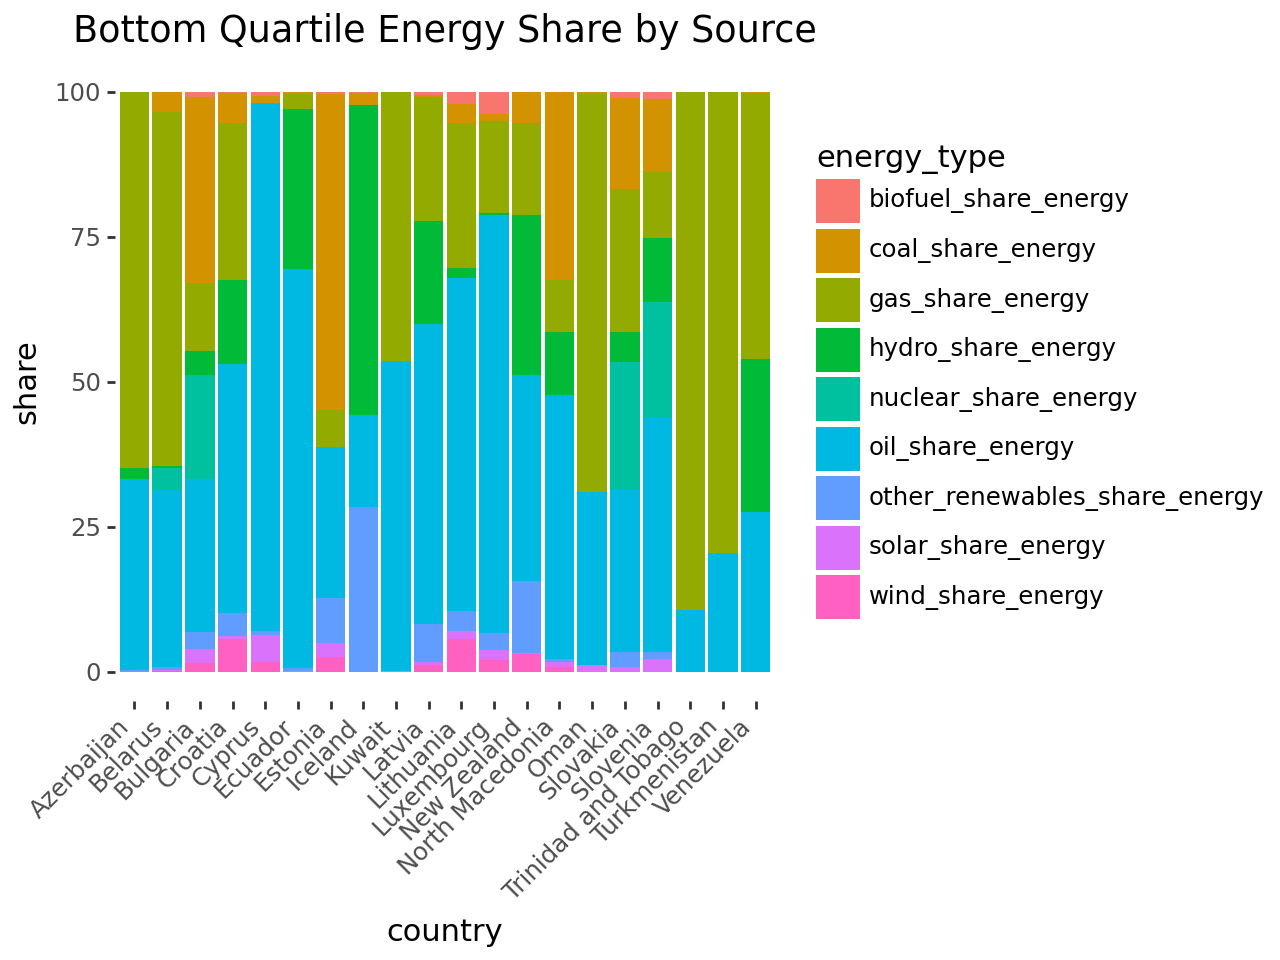

In [16]:
g_1 = (
    ggplot(bottom_quartile_long, aes(x="country", y="share", fill="energy_type"))
    + geom_bar(stat="identity")
    + theme_bw()
    + theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(rotation=45, ha="right")
    )
    + labs(title='Bottom Quartile Energy Share by Source')
)
g_1

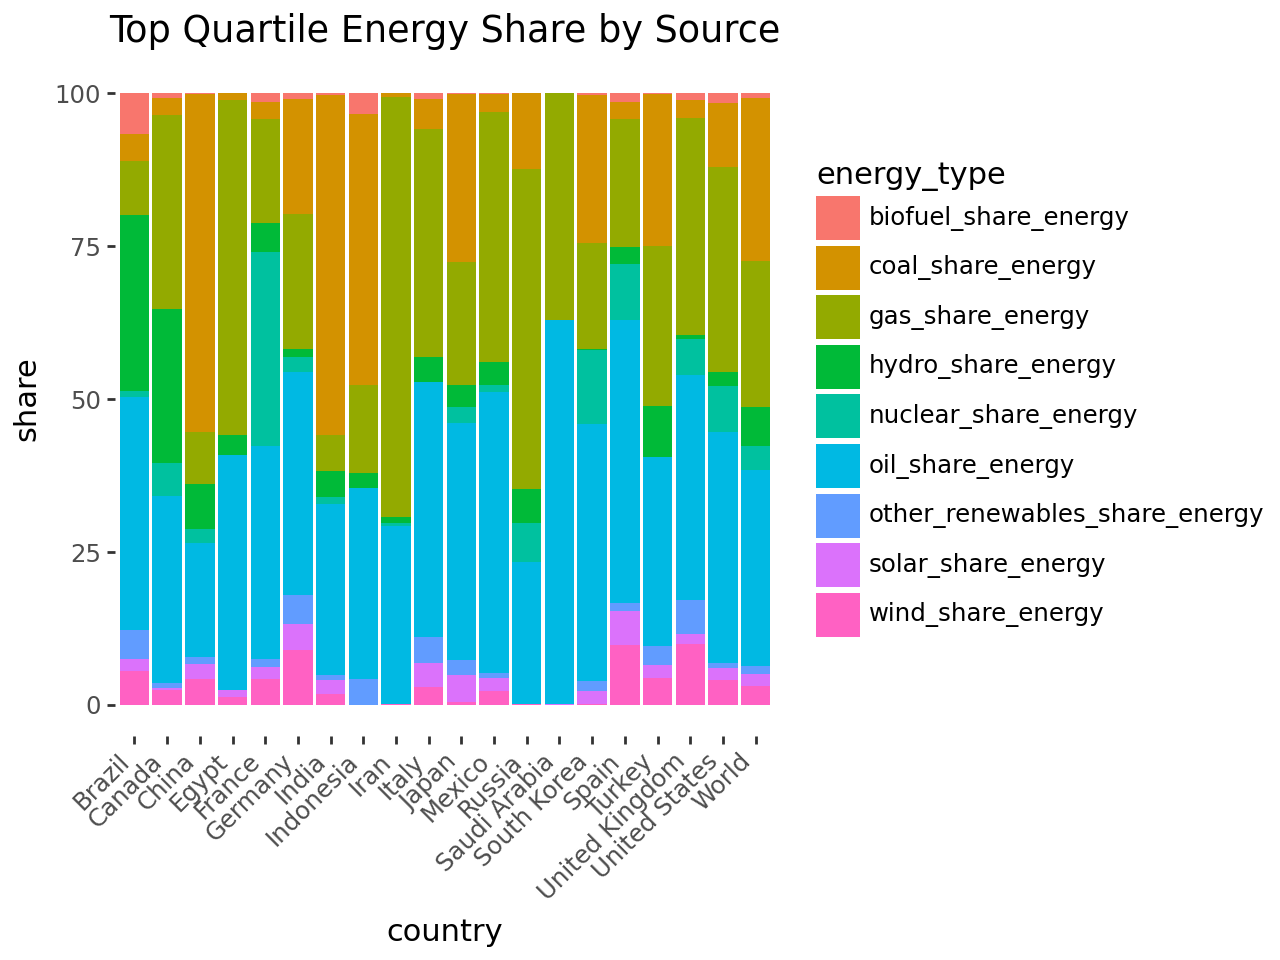

In [17]:
g_2 = (
    ggplot(top_quartile_long, aes(x="country", y="share", fill="energy_type"))
    + geom_bar(stat="identity")
    + theme_bw()
    + theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(rotation=45, ha="right")
    )
    + labs(title='Top Quartile Energy Share by Source')
)
g_2

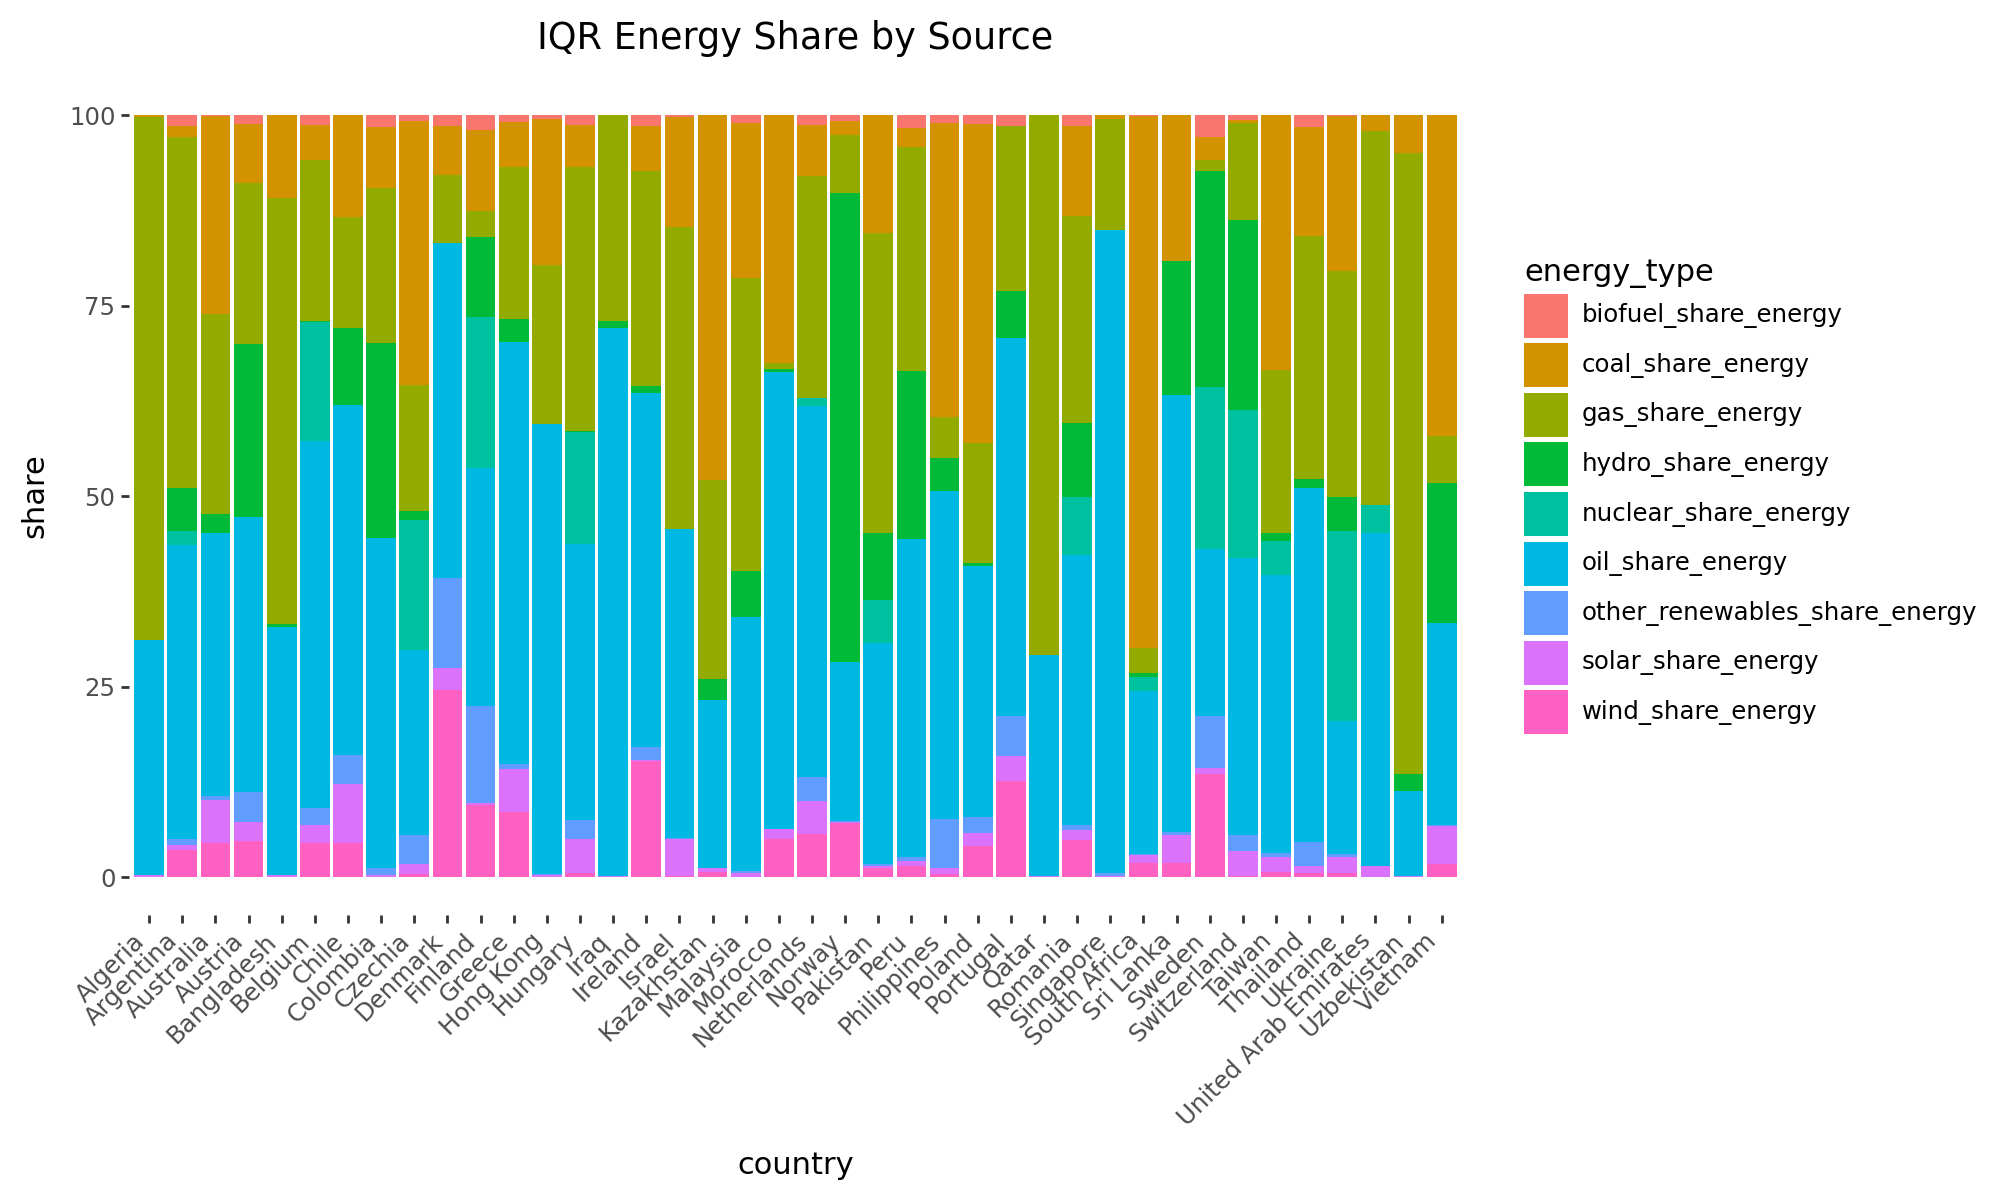

In [39]:
g_3 = (
    ggplot(innner_quartile_range_long, aes(x="country", y="share", fill="energy_type"))
    + geom_bar(stat="identity")
    + theme_bw()
    + theme(
        figure_size=(10,6),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(rotation=45, ha="right")
    )
    + labs(title='IQR Energy Share by Source')
)
g_3

In [41]:
# How has oil production changed over the past century?
data

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23190,Zimbabwe,2020,ZWE,15526837.0,2.317871e+10,NaN,0.0,0.0,0.0,6.440,...,0.298,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
23191,Zimbabwe,2021,ZWE,15797165.0,2.514009e+10,NaN,0.0,0.0,0.0,6.963,...,0.233,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
23192,Zimbabwe,2022,ZWE,16069010.0,2.590159e+10,NaN,0.0,0.0,0.0,6.845,...,0.336,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
23193,Zimbabwe,2023,ZWE,16340778.0,NaN,NaN,0.0,0.0,0.0,7.344,...,0.361,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [99]:
oil_stats = data[['country','year','oil_production']].dropna(subset=['oil_production'])
oil_production = oil_stats.groupby('year')['oil_production'].sum().round(2).reset_index()
oil_production

,year,oil_production
0,1900,1295.90
1,1901,1447.45
2,1902,1595.03
3,1903,1718.81
4,1904,1941.97
...,...,...
120,2020,340466.48
121,2021,344457.78
122,2022,359893.35
123,2023,367027.87


c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\stats\smoothers.py:342: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


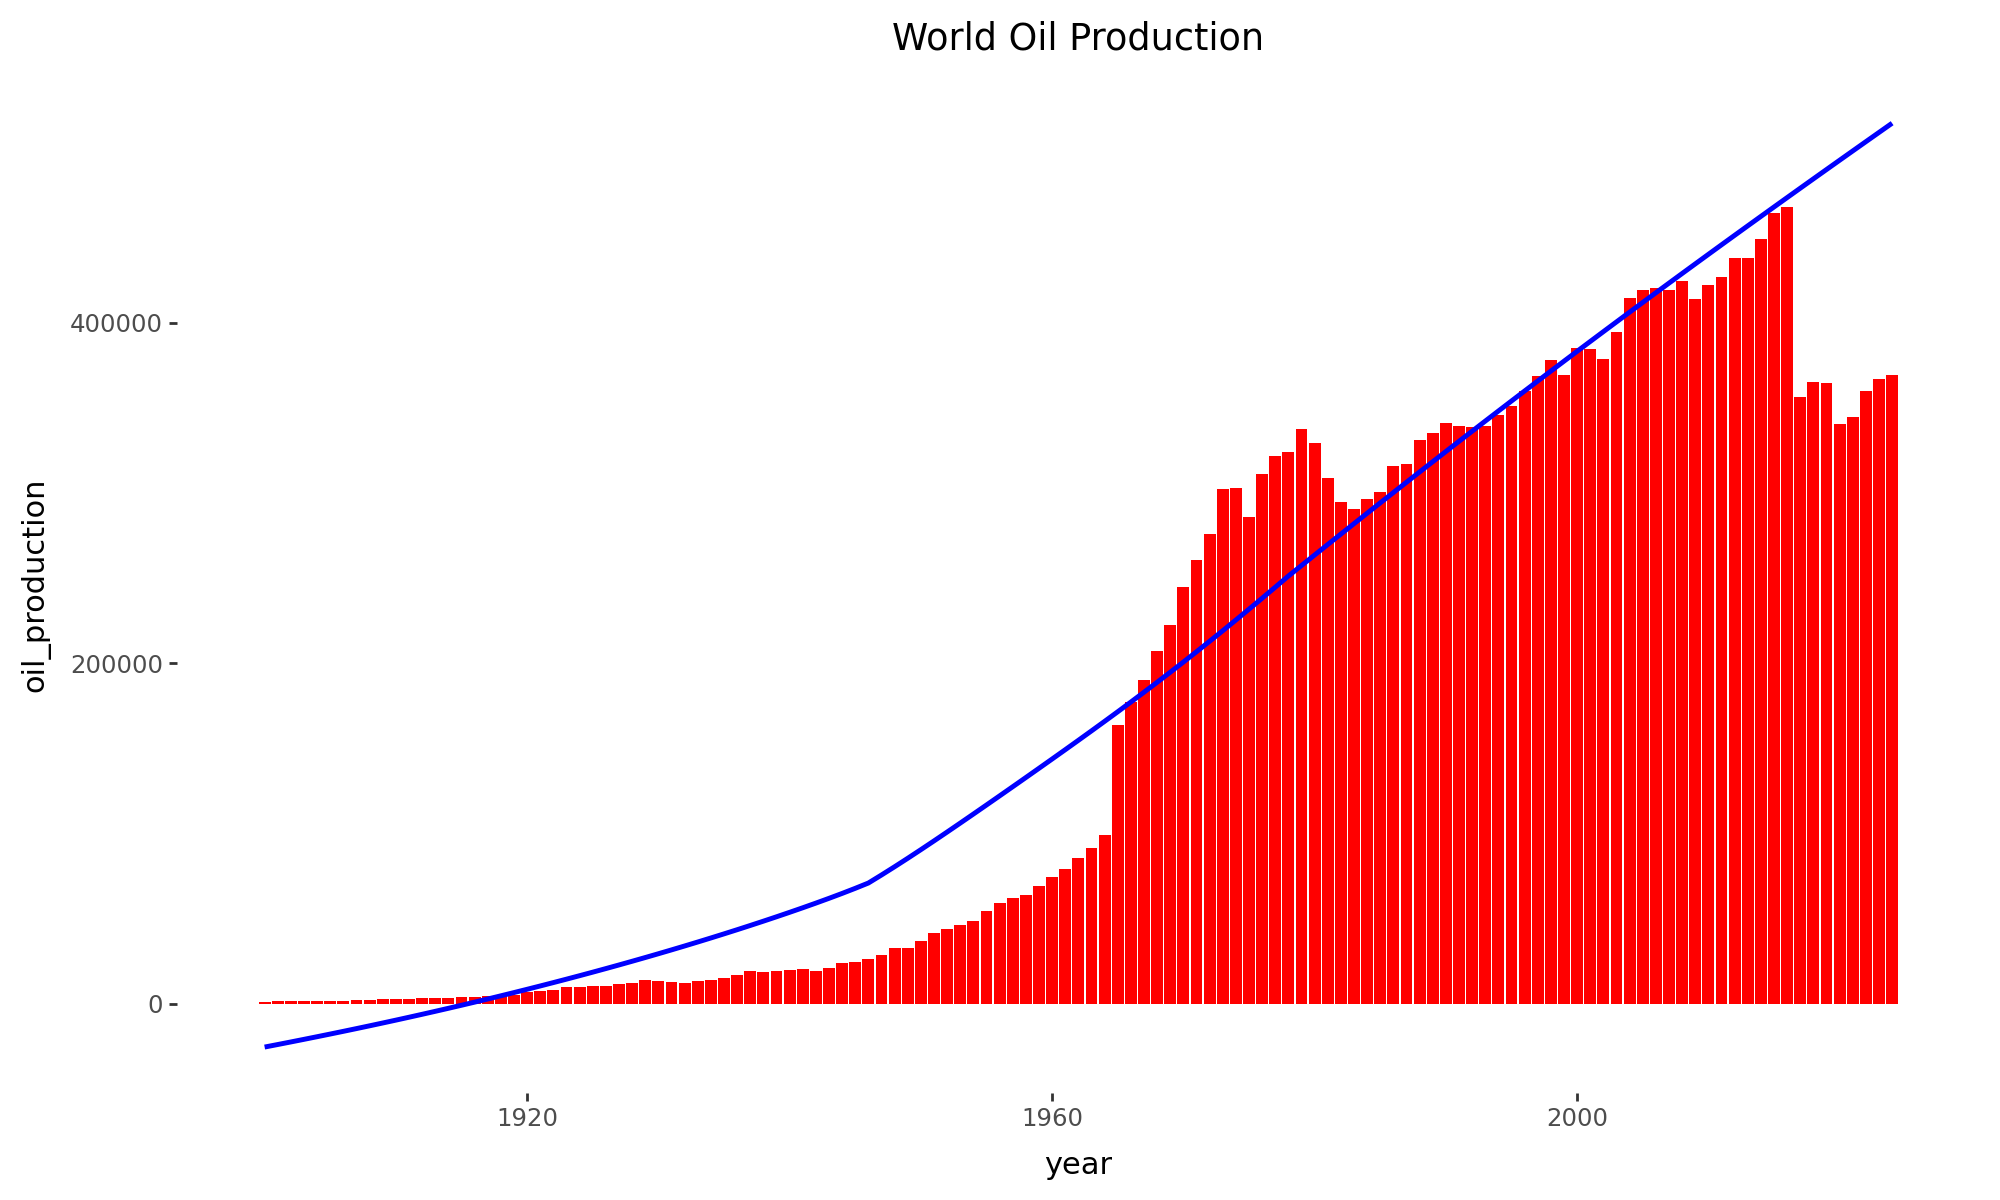

In [117]:
g_4 = (
    ggplot(oil_production, aes(x="year",y='oil_production'))
    + geom_bar(stat='identity',fill='red')
    + geom_smooth(color='blue')
    + theme(
        figure_size=(10,6),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text()
    )
    + labs(title='World Oil Production')
)
g_4

In [84]:
# How is renewable energy consumed across the top quartile?
data.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [112]:
top_renewables = pd.merge(top_quartile[['country']], data[['country','renewables_consumption']],on='country', how='inner').dropna(subset='renewables_consumption')
top_renewables

,country,renewables_consumption
65,Brazil,70.875
66,Brazil,77.517
67,Brazil,81.081
68,Brazil,84.861
69,Brazil,90.811
...,...,...
2410,World,20040.709
2411,World,21197.068
2412,World,22657.553
2413,World,23814.445


In [113]:
renewable_energy = top_renewables.groupby('country').sum('renewables_consumption').reset_index()
renewable_energy = renewable_energy[:-1].sort_values(by="renewables_consumption").round(2)
renewable_energy

,country,renewables_consumption
13,Saudi Arabia,46.78
8,Iran,1448.92
14,South Korea,1593.34
3,Egypt,1891.85
7,Indonesia,3390.66
17,United Kingdom,4894.08
11,Mexico,5525.44
16,Turkey,6337.91
15,Spain,8796.05
9,Italy,10423.35


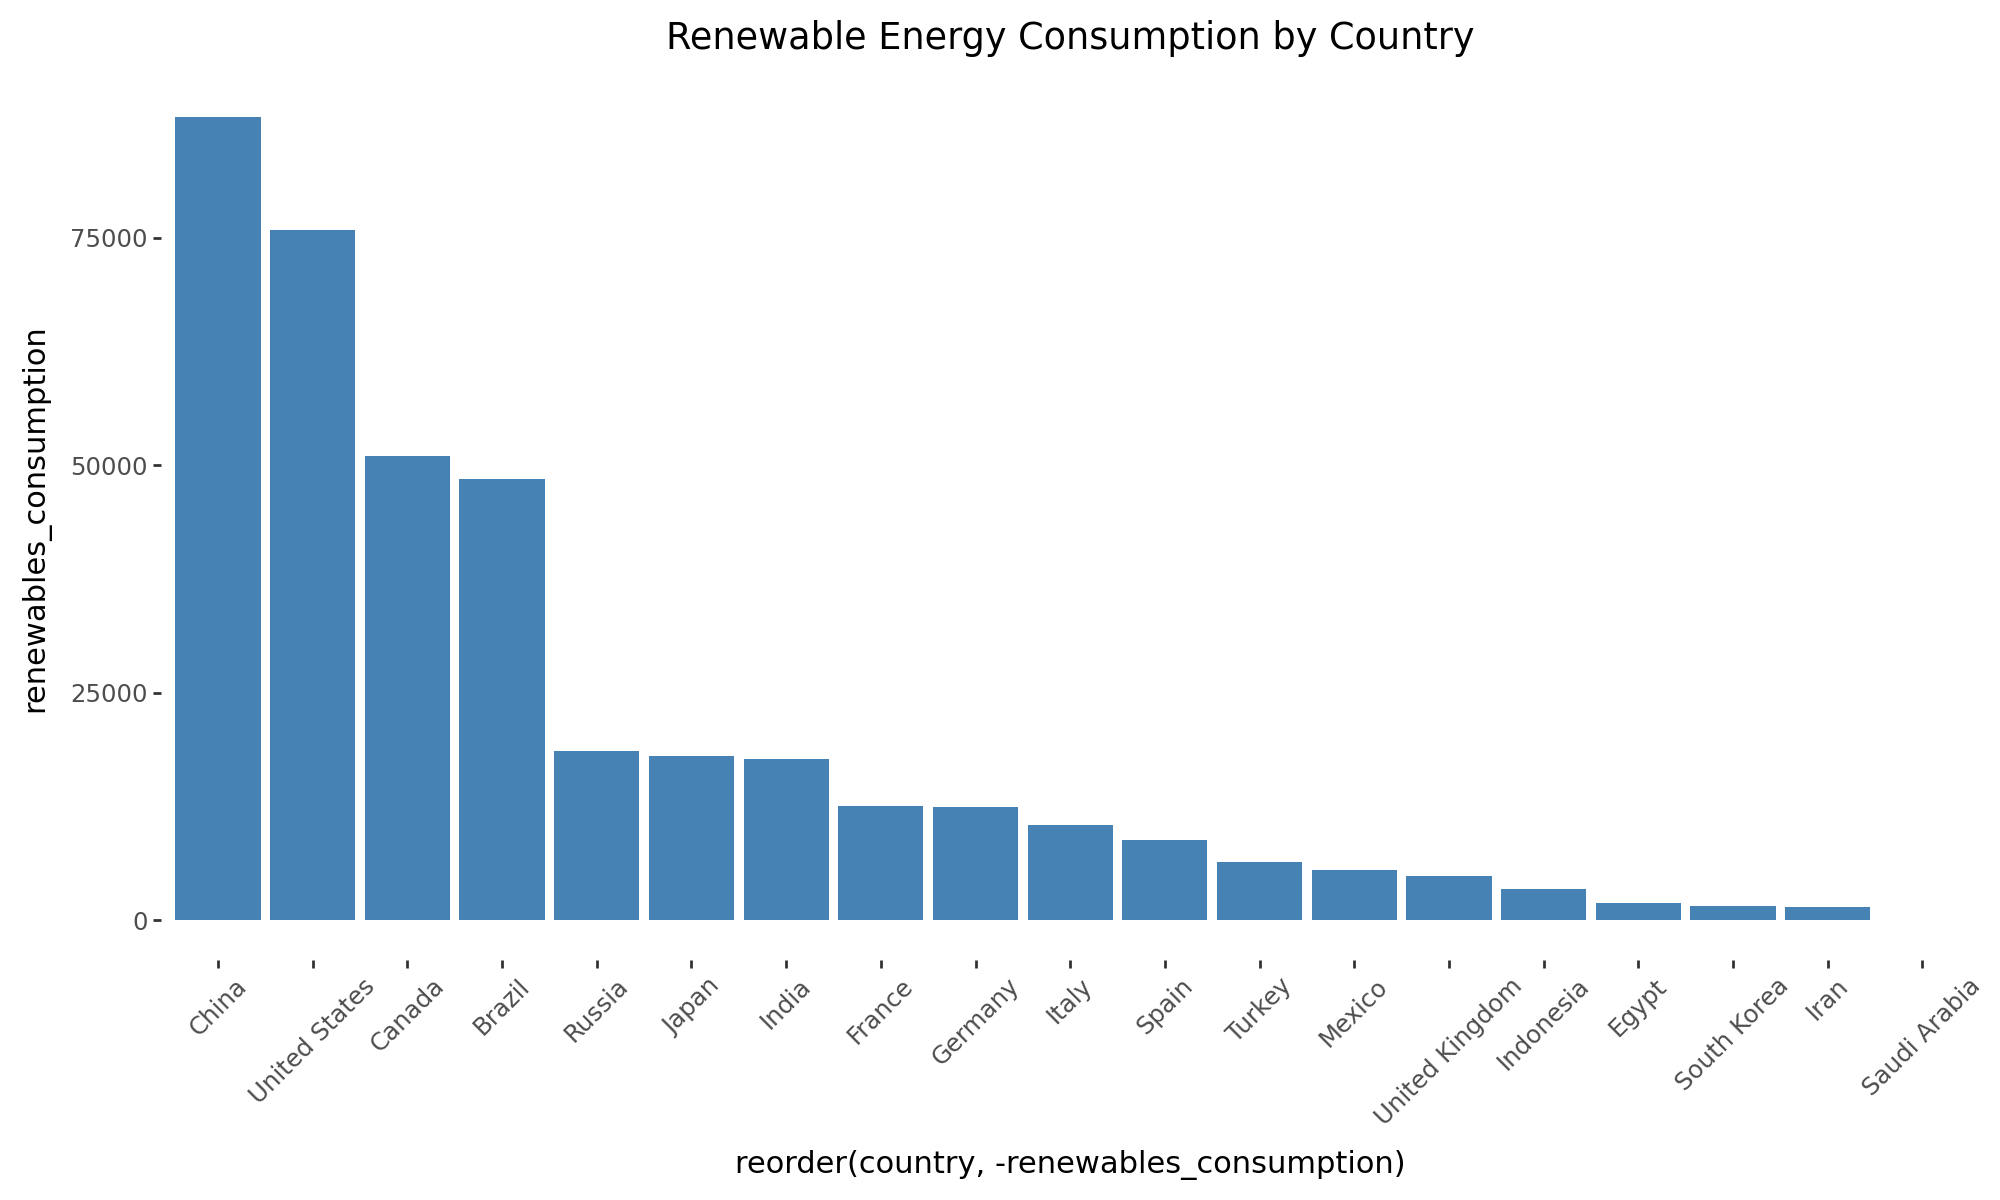

In [ ]:
g_5 = (
    ggplot(renewable_energy, aes(x="reorder(country, -renewables_consumption)",y='renewables_consumption'))
    + geom_bar(stat='identity',fill='steelblue')
    + theme(
        figure_size=(10,6),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(rotation=45)
    )
    + labs(title='Renewable Energy Consumption by Country')
)
g_5